Pontificia Universidad Católica de Chile <br>
Departamento de Ciencia de la Computación <br>
IIC2433 - Minería de Datos
<br>

<center>
    <h2> Tarea 3 </h2>
    <h1> El choque de civilizaciones de Samuel Huntington </h1>
    <p>
        Profesor Vicente Domínguez<br>
        Primer semestre 2022<br>    
        Fecha de entrega: Viernes 13 de mayo a las 22.00
    </p>
    <br>
</center>

<br>

---

# Indicaciones

Deberás entregar SOLO el archivo .ipynb en el buzón respectivo en canvas. 

**IMPORTANTE**: 
- Se te dará puntaje tanto por código como por la manera en la que respondas las preguntas planteadas. Es decir, si tienes un código perfecto pero este no es explicado o no se responden preguntas asociadas a este, no se tendrá el puntaje completo.
- El notebook debe tener todas las celdas de código ejecutadas. Cualquier notebook que no las tenga no podrá ser corregido.
- El carácter de esta tarea es **INDIVIDUAL**. Cualquier instancia de copia resultará en un 1,1 como nota de curso.


# Librerías

Librerías aceptadas:
- `Numpy`
- `Pandas`
- `Matplotlib`
- `Seaborn`

Clases y funciones aceptadas de la librería `sklearn`:
- `silhouette_score` del módulo `metrics`
- `pca` del módulo `decomposition` (solo para la parte 4!)

Librerías y funciones prohibidas:
- Cualquier otra función de `sklearn`
- *Cualquier otra librería que maneje y prediga datos* 

<br>

---

# Introducción

La teoría de civilizaciones de Samuel Huntington plantea como hipótesis que el mayor nivel de identificación cultural de una persona está dado por la civilización a la que pertenece. Citando el artículo de 1993 de Huntington:

> *Los Estados-nación seguirán siendo los actores más poderosos del panorama internacional, pero los principales conflictos de la política global ocurrirán entre naciones y grupos de naciones pertenecientes a diferentes civilizaciones. El choque de civilizaciones dominará la política global. Las fallas entre las civilizaciones serán los frentes de batalla del futuro.*

Si bien esta aglomeración de países en civilizaciones tiende al debate político, estudios como el de la universidad de [Stanford](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0122543) han observado que el comportamiento de individuos en el Internet (como por ejemplo, en el intercambio de correos electrónicos) exhibe tendencias que conforman las grandes agrupaciones correspondientes a las civilizaciones descritas por Huntington.

<br>
<center>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/ca/Civilizations_map.png/750px-Civilizations_map.png" width="400"/>

Fuente: https://es.wikipedia.org/wiki/Choque_de_civilizaciones

</center>

# ¿Cuál es tu tarea?

Como expert@ en minería de datos, se te encarga programar un algoritmo de *clustering* jerárquico aglomerativo que permita identificar una cantidad *n* de civilizaciones a partir cierta información de cada país del mundo.

# Descripción dataset

El *dataset* a utilizar proviene de [World Values Survey](https://www.worldvaluessurvey.org/wvs.jsp), una organización que desde los años 80 realiza encuentas valóricas en distintos países. En esta tarea, trabajaremos con los datos de 81 países recolectados entre 2017 y 2020. En total son 231 preguntas, cada una de ellas tiene distintas respuestas, cada una de las cuales representa a una de las 768 columnas del *dataset*. Por ejemplo, la pregunta `A001` es `Important in life: Family`, la cual es respondida entre los valores 1 y 4. Así, vemos que en Argentina cerca del 91% de las personas responden 1 a esa pregunda (ver `A001_1`), mientras que el 0% responde con 4. Los temas de las preguntas son variados, entre los que se encuentran las posiciones de las personas de cada país frente a, por ejemplo, el aborto, la importancia de la religión, el sentimiento de felicidad, la confianza en el gobierno y la valoración de la democracia. Puedes visitar la página web de WVS para obtener más información.

# Parte 1: Carga y preprocesamiento (0.5 ptos)


In [1]:
import pandas as pd
import numpy as np
from collections import defaultdict

La base de datos se encuentra contenida en el archivo `countries.csv`, el cual pueden cargar directamente al notebook o mediante un link de Google Drive.

In [2]:
url='countries.csv'
# url='https://drive.google.com/uc?id=1_wiSDk4zy2dJf0ZzJaLslz3IVkruq_wZ'

df = pd.read_csv(url, index_col=0)
df

,A001_1,A001_2,A001_3,A001_4,A002_1,A002_2,A002_3,A002_4,A003_1,A003_2,...,H010_1,H010_2,H010_3,H010_4,H011_1,H011_2,H011_3,H011_4,G027A_1,G027A_2
CNTRYCOW,,,,,,,,,,,,,,,,,,,,,
Albania,0.981092,0.017507,0.001401,0.000000,0.355944,0.562937,0.072028,0.009091,0.182517,0.635664,...,0.104167,0.203305,0.160201,0.532328,0.135908,0.204578,0.153791,0.505722,0.995816,0.004184
Andorra,0.895418,0.096614,0.004980,0.002988,0.548805,0.374502,0.068725,0.007968,0.629482,0.323705,...,0.036853,0.063745,0.173307,0.726096,0.041874,0.086740,0.127617,0.743769,0.276892,0.723108
Argentina,0.909272,0.089731,0.000997,0.000000,0.568295,0.339980,0.073779,0.017946,0.373373,0.469469,...,0.074035,0.188738,0.215850,0.521376,0.136698,0.227129,0.208202,0.427971,0.979063,0.020937
Armenia,0.898599,0.094730,0.004670,0.002001,0.395194,0.482644,0.110814,0.011348,0.272605,0.498995,...,0.156504,0.277100,0.275745,0.290650,0.195946,0.289189,0.247297,0.267568,0.963333,0.036667
Australia,0.907377,0.077094,0.013311,0.002219,0.566818,0.389015,0.041903,0.002265,0.426538,0.504556,...,0.075851,0.247630,0.367540,0.308979,0.104619,0.229827,0.303840,0.361714,0.928453,0.071547
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Turkey,0.917978,0.073737,0.006214,0.002071,0.617330,0.349917,0.028607,0.004146,0.544813,0.381328,...,0.050693,0.127816,0.364385,0.457106,0.058442,0.136364,0.345022,0.460173,0.996687,0.003313
Ukraine,0.875346,0.112188,0.010042,0.002424,0.350731,0.545581,0.088727,0.014962,0.360224,0.480182,...,0.019378,0.094333,0.286654,0.599634,0.033151,0.135519,0.246630,0.584699,0.957138,0.042862
United States of America,0.893174,0.085229,0.018511,0.003085,0.482385,0.413086,0.096012,0.008517,0.390008,0.498064,...,0.045010,0.169863,0.355382,0.429746,0.073828,0.197656,0.319141,0.409375,0.894322,0.105678


Realiza un preprocesamiento de los datos nulos y normaliza las columnas.

In [3]:
print(f'Nan columns: {df.columns[df.isnull().sum() > 0]}')

Nan columns: Index([], dtype='object')


In [4]:
# Normalizando df
df = (df-df.mean())/df.std()

# Parte 2: Clustering (4 ptos)

En esta parte deberás implementar el algoritmo de *clustering* jerárquico algomerativo visto en clases. Para esto deberás completar dos clases:

## Clase Civilization (Cluster)

Esta clase representa un *cluster* de paises. Cada instancia posee un identificador único `id` y un conjunto de paises `countries` que pertenecen a dicha civilización. Cada *cluster* se crea a partir de la unión de otros dos. La excepción a esta regla es al inicializar la clase `AgglomerativeClustering`, donde se crea un `cluster` por cada país.

In [5]:
class Civilization:

    def __init__(self, id, sub1=None, sub2=None, country=None):
        # Completa esta clase
        self.id = id
        # Los paises de un cluster se crean a partir de los paises de los padres.
        # O a partir de un pais inicial.
        if country is not None:
            self.countries = country
        else:
            self.countries = pd.concat([sub1, sub2], axis=0)

## Clase AgglomerativeClustering

Esta clase debe implemetar el algoritmo de clustering jerárquico aglomerativo. Para esto **debes** programar los siguientes métodos:


### A) __init__
Inicializa el algoritmo a partir de: la matriz `X` de características, el criterio de enlace `linkage` y la métrica de distancia `distance` a utilizar. Considera además todas las variables que necesites a lo largo de la ejecución de tu algoritmo, se recomienda como mínimo:
*   Un contador que indique el nivel actual de aglomeración.
*   Un diccionario o lista que almacene los clusters en cada nivel de aglomeración. Inicialmente, en el nivel 0, existe un *cluster* por cada país de `X`.
*   La matriz de distancia entre los *clusters* donde el elemento `matriz[id1][id2]` corresponde a la distancia entre los clusters con identificadores `id1` e `id2` respectivamente. 
*   Una copia de la matriz original X.

### B) get_distance
Calcula la distancia entre dos vectores utilizando la métrica definida en `distance`. Este método debe soportar dos métricas distintas:
*   **Manhattan**
*   **Euclidean**


### C) clusterize
Ejecuta el método next_level hasta que solo existan dos *clusters*.

### D) next_level
Equivale a realizar un nivel de aglomeración del algoritmo. A modo general deben:
1.   Obtener el par de *clusters* con menor distancia a partir de la matriz de distancias.
2.   Unir ambos *clusters*.
3.   Guardar el nuevo conjunto de *clusters* correspondientes al nivel actual de aglomeración.
4.   Actualizar la matriz de distancias según el nuevo conjunto de *clusters*.

### E) update_matrix
Actualiza la matriz de distancias dado un nuevo *cluster*. La distancia entre *clusters* debe poder calcularse según los siguientes enlaces (`linkage`) vistos en clases:
1.   **centroid**: distancia entre medias.
2.   **complete**: enlace completo.

<br>

---

**NOTA**: puedes entregarle los argumentos que quieras a estos métodos y tambien crear otros métodos que consideres pertinentes.

In [6]:
class AgglomerativeClustering:

    def __init__(self, X, num_clusters = 2, linkage="centroid", distance="Manhattan"):
        # Número de clusters a formar
        self.num_clusters = num_clusters
        # Vectores de cada pais.
        self.X = X.copy()
        # Linkage.
        self.linkage = linkage
        # Métrica de distancia.
        self.distance = distance
    
        self.aglomeracion = 0
        self.clusters = {'level0': [Civilization(id, country=country[1].to_frame().T) for country, id in zip(X.iterrows(), range(X.shape[0])) ]}
        
        
        # Matriz de distancias (obtén la matriz de distancias inicial)
        self.matrix = self.init_distances()  
        
        # Copia de la matriz de distancias original.
        self.original_matrix = self.matrix.copy()
        
    def init_distances(self):
        clusters  = self.clusters[f'level{self.aglomeracion}']
        distances = [[self.get_distance(cluster2.countries.values.mean(0), cluster.countries.values.mean(0)) for cluster2 in clusters] for cluster in clusters]
        return np.array(distances)
    
    def clusterize(self):
        while len(self.clusters[f'level{self.aglomeracion}']) > self.num_clusters:
            self.next_level()
            self.aglomeracion = self.aglomeracion + 1
            
    def next_level(self):
        # Obtén el par de clusters con menor distancia de la matriz de distancias.
        index = np.where(self.matrix  == np.amin(self.matrix [np.nonzero(self.matrix)]))
        min_indexes = list(zip(index[0], index[1]))
        i, j  =  min_indexes[0]
       
        # Crea un nuevo cluster a partir de los dos anteriores
        clusters = self.clusters[f'level{self.aglomeracion}']
        new_index = clusters[-1].id + 1
        new_cluster  = Civilization(new_index, sub1=clusters[i].countries, sub2=clusters[j].countries, country=None)
        
        # El nuevo nivel tiene los clusters anteriores y la union de los dos clusters elegidos.
        new_level_clusters = [x for x in clusters]
       
        if (i > j):
            new_level_clusters.pop(i)
            new_level_clusters.pop(j)
        else:
            new_level_clusters.pop(j)
            new_level_clusters.pop(i)
         
        new_level_clusters.append(new_cluster)
        self.clusters[f'level{self.aglomeracion + 1}'] = new_level_clusters
        
        # Elimina los dos clusters elegidos de la matriz de distancias.
        
        if (i > j):
            
            self.matrix = np.delete(self.matrix,(i), axis=0)
            self.matrix = np.delete(self.matrix,(j), axis=0)
            self.matrix = np.delete(self.matrix,(i), axis=1)
            self.matrix = np.delete(self.matrix,(j), axis=1)
        else:
            self.matrix = np.delete(self.matrix,(j), axis=0)
            self.matrix = np.delete(self.matrix,(i), axis=0)
            self.matrix = np.delete(self.matrix,(j), axis=1)
            self.matrix = np.delete(self.matrix,(i), axis=1)
       
        # Actualiza la matriz de distancias ingresando el nuevo cluster.
        self.update_matrix(new_cluster, i, j)
        

  
    def update_matrix(self, cluster, i, j):
        clusters = [x for x in self.clusters[f'level{self.aglomeracion}']]
        distances = []
        
        if (i > j):
            clusters.pop(i)
            clusters.pop(j)
        else:
            clusters.pop(j)
            clusters.pop(i)
            
        if self.linkage == "centroid":
            cluster_means = cluster.countries.values.mean(0)
            
            distances = [self.get_distance(cluster2.countries.values.mean(0), cluster_means) for cluster2 in clusters]
        
        elif self.linkage == "complete":
            for x in clusters:
                distances.append(max([self.get_distance(row, row2) for row in x.countries.values for row2 in cluster.countries.values]))
            
        self.matrix = np.append(self.matrix, [[d] for d in distances], axis = 1)
        distances.append(0)
        self.matrix = np.append(self.matrix, [distances], axis = 0)
        
    def get_distance(self, vector1, vector2):
        if self.distance == "Manhattan": 
            return np.sqrt((vector1 - vector2)*(vector1 - vector2)).sum()
    
        elif self.distance == "Euclidean":
            return np.sqrt(((vector2 - vector1)*(vector2 - vector1)).sum())


# Parte 3 (1 pto)

En esta parte deberás comparar distintas configuraciones de tu algoritmo de *clustering* y concluir cual de estas es la mejor.

Una forma de comparar *clusters* es a partir de su *silhouette score*. Este mide cuán similar es un objeto a su propio *cluster* (cohesión) en comparación con otros *clusters* (separación). Completa el siguiente código utilizando la función `silhouette_score` de `sklearn.metrics`.

NOTA: debes adaptar la estructura de clusters retornada por `AgglomerativeClustering` de tal forma que pueda ser utilizada como los `labels` que recibe `silhouette_score` ([documentación](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html)).

In [7]:
algorithm = AgglomerativeClustering(df, linkage='centroid', distance = "Euclidean")
algorithm.clusterize()

In [8]:
aux_df = df.copy()

aux_df.loc[aux_df.index.isin(algorithm.clusters['level79'][0].countries.index.values), 'label'] = 0
aux_df.loc[aux_df.index.isin(algorithm.clusters['level79'][1].countries.index.values), 'label'] = 1

In [9]:
from sklearn.metrics import silhouette_score

def civilization_silhouette_score(X, clusters):
    return silhouette_score(X, clusters, metric='euclidean')

In [10]:
civilization_silhouette_score(aux_df.drop('label', axis=1).values, aux_df.label)

0.2316620884262037

Ahora realiza una busqueda de hiperparámetros para encontrar la configuración que retorne el mejor *silhouette_score*. Como mínimo debes probar todas las combinaciones posibles de los siguientes parámetros:

*   ***Linkage***: Centroid y Complete.
*   ***Distance***: Manhattan y Euclidean.
*   **Número de clusters**: 5, 6, 7, 8, 9 y 10.

In [11]:
# Búsqueda de hiperparámetros
hiperparameters = {'linkage': ['centroid', 'complete'],
                  'distance': ['Manhattan', 'Euclidean'],
                  'num_clusters': [5,6,7,8,9,10]}


best_score = -np.inf
best_score2 = -np.inf
best_kmeans = 1
best_params = dict()
report = pd.DataFrame(columns=['linkage', 'distance', 'num_clusters'])
for linkage in hiperparameters['linkage']:
    for distance in hiperparameters['distance']:
        for num_clusters in hiperparameters['num_clusters']:
    
            algorithm = AgglomerativeClustering(df, num_clusters=num_clusters, linkage=linkage, distance = distance)
            algorithm.clusterize()
            
            aglomeraciones = algorithm.aglomeracion
            last_level = algorithm.clusters[f'level{aglomeraciones}']
            aux_df = df.copy()
            
            for n in range(num_clusters):
                aux_df.loc[aux_df.index.isin(last_level[n].countries.index.values), 'label'] = n
            
            
            score = civilization_silhouette_score(aux_df.drop('label', axis=1).values, aux_df.label)
            if(score > best_score):
                best_score  = score
                best_params = {'linkage' : linkage, 'distance': distance, 'num_clusters': num_clusters}
               
            report = report.append({'linkage' : linkage, 'distance': distance, 'num_clusters': num_clusters, 'score': score}, ignore_index=True)

print('\n---------------Mejores------------------\n')
print(f'Best score: {best_score} \nBest params: {best_params}')


---------------Mejores------------------

Best score: 0.11205759189518813 
Best params: {'linkage': 'complete', 'distance': 'Manhattan', 'num_clusters': 8}


In [12]:
report.sort_values('score', ascending=False)

,linkage,distance,num_clusters,score
15,complete,Manhattan,8,0.112058
13,complete,Manhattan,6,0.112035
17,complete,Manhattan,10,0.112026
12,complete,Manhattan,5,0.111071
16,complete,Manhattan,9,0.109388
14,complete,Manhattan,7,0.106593
23,complete,Euclidean,10,0.105751
6,centroid,Euclidean,5,0.105002
22,complete,Euclidean,9,0.101658
21,complete,Euclidean,8,0.099866


In [13]:
a = report.groupby('num_clusters')[report.columns].groups
for k in a.keys():
    display(report.loc[report.index.isin(a[k])].sort_values('score', ascending=False))

,linkage,distance,num_clusters,score
12,complete,Manhattan,5,0.111071
6,centroid,Euclidean,5,0.105002
18,complete,Euclidean,5,0.093223
0,centroid,Manhattan,5,0.065705


,linkage,distance,num_clusters,score
13,complete,Manhattan,6,0.112035
19,complete,Euclidean,6,0.096137
7,centroid,Euclidean,6,0.082575
1,centroid,Manhattan,6,0.041846


,linkage,distance,num_clusters,score
14,complete,Manhattan,7,0.106593
20,complete,Euclidean,7,0.096217
8,centroid,Euclidean,7,0.073299
2,centroid,Manhattan,7,-0.025388


,linkage,distance,num_clusters,score
15,complete,Manhattan,8,0.112058
21,complete,Euclidean,8,0.099866
9,centroid,Euclidean,8,0.060419
3,centroid,Manhattan,8,-0.030961


,linkage,distance,num_clusters,score
16,complete,Manhattan,9,0.109388
22,complete,Euclidean,9,0.101658
10,centroid,Euclidean,9,0.026393
4,centroid,Manhattan,9,-0.037334


,linkage,distance,num_clusters,score
17,complete,Manhattan,10,0.112026
23,complete,Euclidean,10,0.105751
11,centroid,Euclidean,10,0.020765
5,centroid,Manhattan,10,-0.049665


Hecho esto, responde las siguientes preguntas. Debes fundamentar todas tus respuestas con los resultados obtenidos en la búsqueda de hiperparámetros.
1.   ¿Cuál configuración fue la mejor? 

Respuesta: Linkage : complete con distancia de Manhattan y 8 clusters dado que fue la de mayor score para la métrica silhouette


2.   ¿Qué métrica de distancia da mejores resultados? (puedes comparar las métricas fijando los valores de *linkage* y el número de clusters.) 

Respuesta: Depende de la linkage utilizada, Manhattan gana en todos los casos donde se utiliza linkage complete, mientras que Euclidean gana en todos los casos que se usa linkage centroide (evidenciable en los prints de más arriba donde se imprime por grupos).

3.   ¿Qué relación observas entre el método de enlace y la métrica de distancia utilizada? **Justifica**.

Si bien Complete y Manhattan son los ganadores siempre, la métrica de distancia a usar dependera de la linkage (evidenciable en las veces que Manhattan pierde cuando esta acompañada de la linkage centroid), ahora; intentando justificar el porque ganaron Complete y Manhattan creo que por un lado Complete le gana a Centroid en este caso dado que no depende de la media para formar clusters, además dado que los datos estan normalizados es esperable que sus medias esten cercanas, por lo tanto formar clusters con medias no se ve tan buena idea, ya que, de por si los datos estan muy agrupados. Por otro lado creo que Manhattan gana a Euclidean esta vez dado que Manhattan toma las contribuciones de cada pregunta por separado, lo cual repercute en una mayor distancia en comparación a la Euclideana (esto me lo imagino con un triangulo, donde los catetos serian como la distancia de Manhattan y la hipotenusa la Euclideana), lo cual quiza ayuda en este problema donde los datos estan bastante agrupados dada su normalización (por lo tanto Complete y Manhattan se boostearian entre sí para afrontar este problema de datos muy agrupados)... 

Posdata: Todo esto son suposiciones la verdad y no creo que estas mismas conclusiones se puedan extrapolar a casos diferentes.

# Parte 4 (0.5 ptos)

Finalmente, debes visualizar la mejor aglomeración encontrada en la Parte 3. El siguiente código reduce la matriz X a dos dimensiones. De esta forma puedes graficar los *clusters* encontrados utilizando dos ejes y el color o forma para identificar cada civilización.

In [14]:
# NO MODIFICAR ESTA CELDA
from sklearn.decomposition import PCA

def reduce_to_2D(X):
    pca   = PCA(n_components=2)
    new_X = pca.fit_transform(X)
    return pd.DataFrame(new_X, index=X.index)

<AxesSubplot:xlabel='0', ylabel='1'>

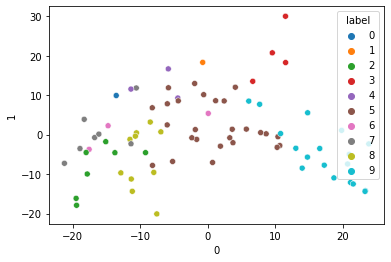

In [15]:
# Graficar los mejores clusters encontrados a partir de la matrix X reducida
reduced = reduce_to_2D(df)
reduced = reduced.rename(columns = { 0: '0', 1: '1' })

import matplotlib.pyplot as plt
import seaborn as sns

preds = AgglomerativeClustering(df, linkage=best_params['linkage'], distance = best_params['distance'])
preds.clusterize()

aglo = preds.aglomeracion
preds = preds.clusters[f'level{aglo}']
aux_df = df.copy()
            
for n in range(num_clusters):
    aux_df.loc[aux_df.index.isin(last_level[n].countries.index.values), 'label'] = n

reduced = pd.merge(reduced, aux_df['label'], how='inner', left_index=True, right_index=True)
reduced['label'] = reduced['label'].astype(int)
reduced['label'] = pd.Categorical(reduced.label)

sns.scatterplot(data=reduced, x='0', y='1', hue="label")

# Bonus

Esta tarea cuenta con una serie de bonus a los que podrás optar. Cabe recalcar que para optar a estos beneficios la nota de tu tarea (sin bonus) debe ser **igual o superior a 3,95** (sin considerar posibles descuentos).

## Dendrograma (2 décimas)

Los [dendrogramas](https://es.wikipedia.org/wiki/Dendrograma) son una forma muy útil de visualizar el funcionamiento de los algoritmos de *clustering* aglomerativo. Para completar este bonus debes generar un dendrograma a partir de tu mejor configuración de `AgglomerativeClustering`. Para esto debes utilizar la función `dendrogram` del módulo `cluster.hierarchy` de scipy.

<br>
<center>
<img src="https://docs.scipy.org/doc/scipy/_images/scipy-cluster-hierarchy-dendrogram-1_00.png" width="400"/>

Fuente: https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html

</center>

NOTA: Debes investigar que formato tiene la matriz `Z` (*linkage matrix*) que recibe `dendrogram` y adaptar el output de tu algoritmo acordemente. Está estrictamente prohibido obtener `Z` a partir de la función `linkage` del módulo `cluster.hierarchy`. Puedes modificar la clase `AgglomerativeClustering` si lo consideras necesario.

In [16]:
from scipy.cluster.hierarchy import dendrogram
# Grafica el dendograma aquí